In [1]:
'''
    Titulo: Como a mobilidade urbana se relaciona com o aumento de numero de casos de covid.


'''


import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# %matplotlib notebook

In [2]:


# path = os.path.dirname(os.path.abspath(__file__))


'''
    Peguei essa primeira parte desse site: https://www.viralml.com/video-content.html?v=A6nWZKZpL3k
'''
# Se demorar mto pra carregar o csv, baixa o csv e descomenta essa linha (ps: ta com o \\ do windows)
# gmr_df = pd.read_csv(path+'\\Global_Mobility_Report.csv')  
gmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
gmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [77]:
# Categories available
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']
categories_google_mobility

regions_list_BR = [ 'Federal District', ' State of Acre','State of Alagoas','State of Amapá', 'State of Amazonas', 
                    'State of Bahia', 'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
                    'State of Maranhão', 'State of Mato Grosso', 'State of Mato Grosso do Sul', 'State of Minas Gerais',
                    'State of Pará', 'State of Paraíba', 'State of Paraná', 'State of Pernambuco', 'State of Piauí', 
                    'State of Rio de Janeiro', 'State of Rio Grande do Norte',
                    'State of Rio Grande do Sul', 'State of Rondônia', 'State of Roraima', 'State of Santa Catarina', 
                    'State of São Paulo', 'State of Sergipe', 'State of Tocantins'
                  ]

regions_abbr_BR = [ 'DF','AC','AL','AP','AM','BA','CE','ES','GO','MA','MT','MS','MG','PA',
                    'PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']


{'State of São Paulo':         country_region_code country_region        sub_region_1 sub_region_2  \
1327282                  BR         Brazil  State of São Paulo          NaN   
1327283                  BR         Brazil  State of São Paulo          NaN   
1327284                  BR         Brazil  State of São Paulo          NaN   
1327285                  BR         Brazil  State of São Paulo          NaN   
1327286                  BR         Brazil  State of São Paulo          NaN   
...                     ...            ...                 ...          ...   
1327792                  BR         Brazil  State of São Paulo          NaN   
1327793                  BR         Brazil  State of São Paulo          NaN   
1327794                  BR         Brazil  State of São Paulo          NaN   
1327795                  BR         Brazil  State of São Paulo          NaN   
1327796                  BR         Brazil  State of São Paulo          NaN   

        metro_area iso_3166_

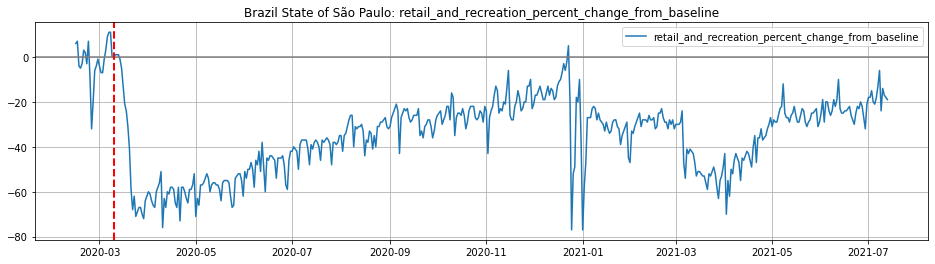

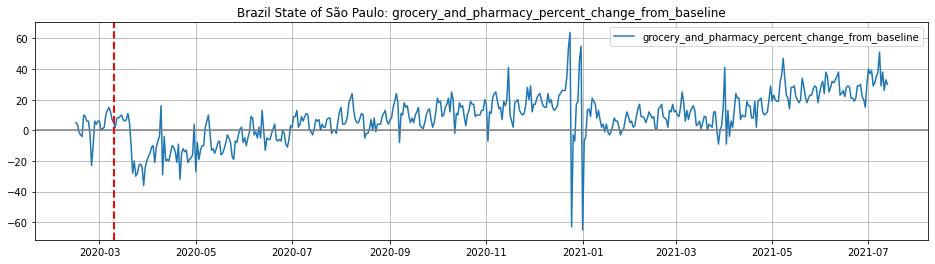

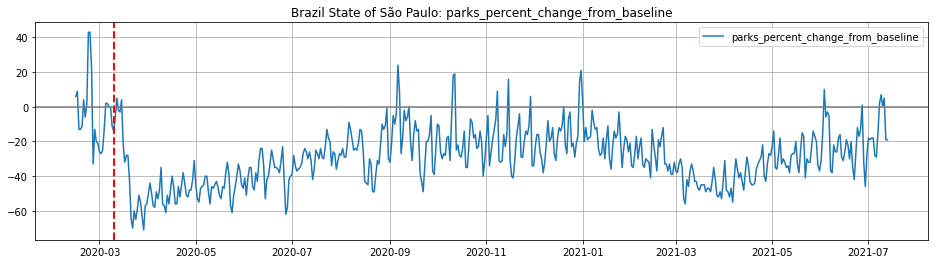

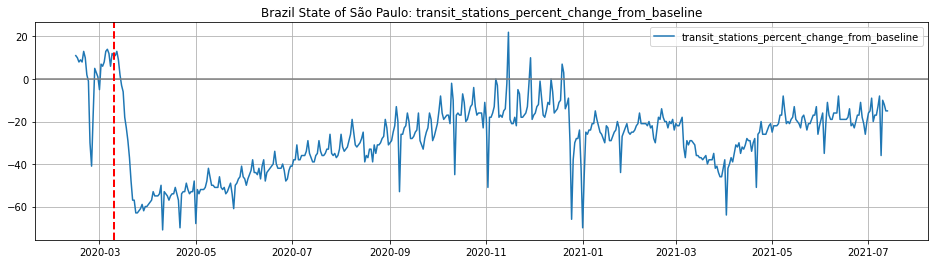

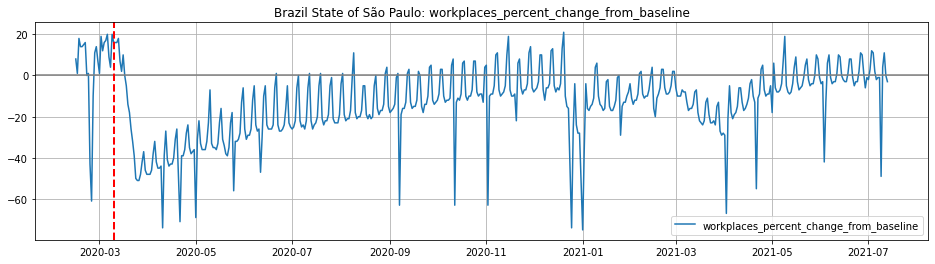

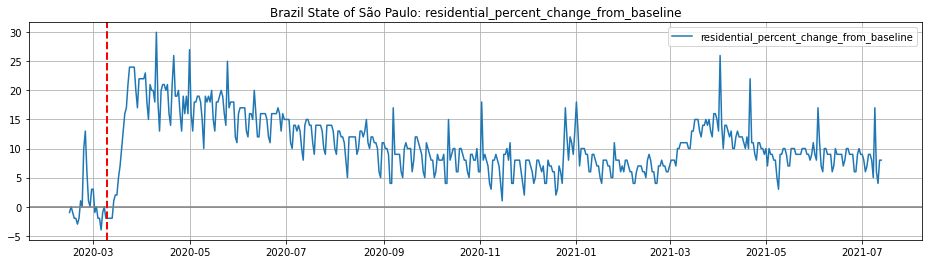

In [78]:
def getAllRegionsGroups(regions_list=regions_list_BR, country="Brazil"):
    regions_dict = {}
#     print(regions_list)
    for r in regions_list:
        sub_df = gmr_df[(gmr_df['country_region']== country) & (gmr_df['sub_region_1']==r) & (pd.isnull(gmr_df['sub_region_2']))]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[r]=sub_df
#     print(regions_dict)
    return regions_dict


def plotGroups(sub_df, region, country="Brazil"):
    # let's plot all time series for this region
    for group in categories_google_mobility:
#         print(group)
        
        fig, ax = plt.subplots(figsize=(16, 4))
        plt.plot(sub_df['date'], sub_df[group], label=group)
        ax.axhline(y=0, color='gray')
        ax.axvline(pd.to_datetime('2020-03-10'), color='r', linestyle='--', lw=2)
        plt.title(country + ' '+ region + ': ' + group)
        plt.legend(loc='best') 
        plt.grid()
        plt.show()
        # plt.savefig(fname=path+'\\'+group+'.png', format='png')


# - - - - - - - -  TESTE - - - - - - - -  
sdf = getAllRegionsGroups(regions_list=['State of São Paulo'])   #, 'State of Rio de Janeiro'
print(sdf)
plotGroups(sdf['State of São Paulo'], 'State of São Paulo')
# plotGroups(sdf['State of Rio de Janeiro'], 'State of RIO')

In [79]:
# - - - - - - - -  CASOS DE COVID - - - - - - - -  
covid_df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
col = [ 'epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths', 'newCases', 'totalCases', 
        'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 
        'deaths_by_totalCases', 
        'recovered', 'suspects', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 
        'vaccinated_per_100_inhabitants', 'vaccinated_second', 
        'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants']

print(covid_df.head)

def getAllRegionsCovid(regions_list=regions_list_BR, regions_abbr=regions_abbr_BR,
                       country="Brazil"):
    regions_dict = {}
    
#     print(regions_list)
    for r in range(len(regions_list)):
        sub_df = covid_df[(covid_df['state']== regions_abbr[r])]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[regions_list[r]]=sub_df
#     print(regions_dict)
    return regions_dict


    

<bound method NDFrame.head of        epi_week        date country  state   city  newDeaths  deaths  \
0             9  2020-02-25  Brazil     SP  TOTAL          0       0   
1             9  2020-02-25  Brazil  TOTAL  TOTAL          0       0   
2             9  2020-02-26  Brazil     SP  TOTAL          0       0   
3             9  2020-02-26  Brazil  TOTAL  TOTAL          0       0   
4             9  2020-02-27  Brazil     SP  TOTAL          0       0   
...         ...         ...     ...    ...    ...        ...     ...   
13757       128  2021-07-16  Brazil     SC  TOTAL         46   17520   
13758       128  2021-07-16  Brazil     SE  TOTAL          7    5853   
13759       128  2021-07-16  Brazil     SP  TOTAL        419  134320   
13760       128  2021-07-16  Brazil     TO  TOTAL          0    3386   
13761       128  2021-07-16  Brazil  TOTAL  TOTAL       1377  540683   

       newCases  totalCases  deathsMS  ...   recovered   suspects       tests  \
0             1         

In [80]:
regions_selected = [regions_list_BR[i] for i in [24,25]]
regions_selected_abbr = [regions_abbr_BR[i] for i in [24,25]]

print(regions_selected_abbr)

cases_df = getAllRegionsCovid(regions_selected, regions_selected_abbr)
newCases = cases_df[regions_selected[0]]['newCases'].values
covid_dates = cases_df[regions_selected[0]]['date'].values

mob_df = getAllRegionsGroups(regions_list=regions_selected)
mob_dates = mob_df[regions_selected[0]]['date'].values
mob_dates += np.timedelta64(7,'D') # com offset de 7 dias

scaler = MinMaxScaler(feature_range=(-1,1))
newCases_norm = newCases/np.max(newCases)

mobility_norm = scaler.fit_transform(mob_df[regions_selected[0]][categories_google_mobility].values)
print(newCases)

['SP', 'SE']
[    1     0     0     1     0     0     0     0     1     3     4     3
     3     0     3    11    16    10     9    71    16    12    77    45
   110    63   172   114    65    52   191   170   183    45    66   822
   642   525   542   418   154   246   816  1026   772   736   203   336
   140   476  1672   525  1273  1053   373   313   805   529   826  1086
  2178   711   981  2345  2117  2540  1676   800   598   415  1866  3800
  2075  1902  2581  1033   687  1588  3378  3189  4092  2805  1162   721
  2929  3864  3880  3132  3687  1603  1464  2392  3466  6382  5691  5586
  2556  1598  6999  5188  5717  5365  5984  2524  1520  5545  6178  6204
  5380  4975  5327  3258  8825  1232  1111 19030  4135  3392  2788  7502
  9347  9765  9921  7073  6156  3408  6235  8555 12244  8523  1828  7649
  2891  9638  8657  8350  9395  7780  5107  2610 12000  6569  8872  5367
  4612  3022  1385  6235 16777 12561 11211 16263  4501  3672 12647 13896
 14809 13298 10014  6367  1533 15371  

retail_and_recreation_percent_change_from_baseline


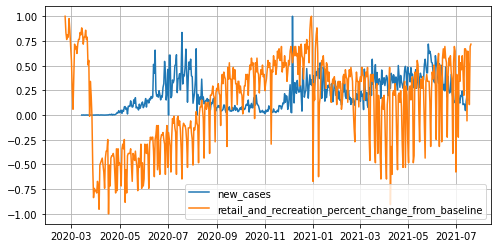

grocery_and_pharmacy_percent_change_from_baseline


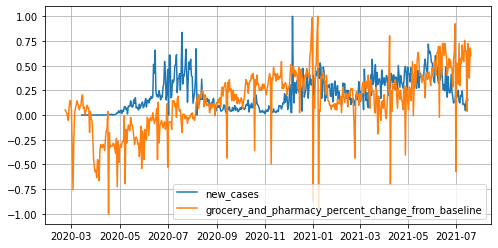

parks_percent_change_from_baseline


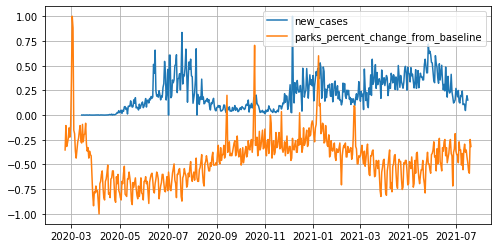

transit_stations_percent_change_from_baseline


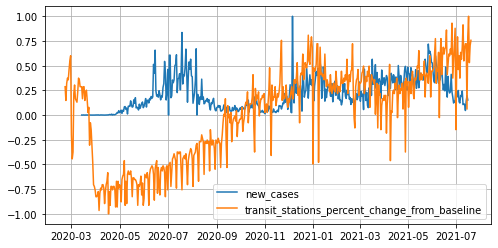

workplaces_percent_change_from_baseline


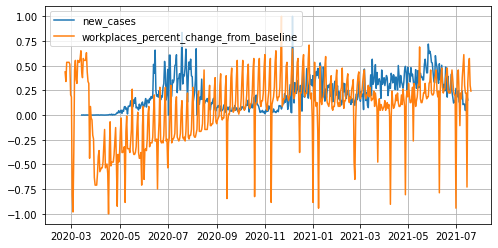

residential_percent_change_from_baseline


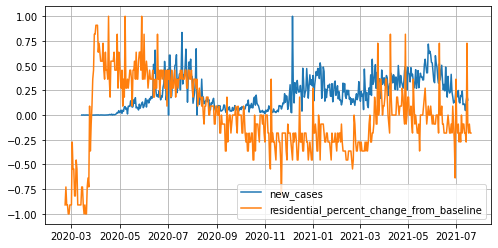

In [46]:
i = 0
for group in categories_google_mobility:
    print(group)
    group_values = mobility_norm[:,i]
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.plot(covid_dates[:], newCases_norm[:], label="new_cases")
    plt.plot(mob_dates[:], group_values[:], label=group)
   
    plt.legend(loc='best') 
    plt.grid()
    plt.show()
    
    i+=1

retail_and_recreation_percent_change_from_baseline


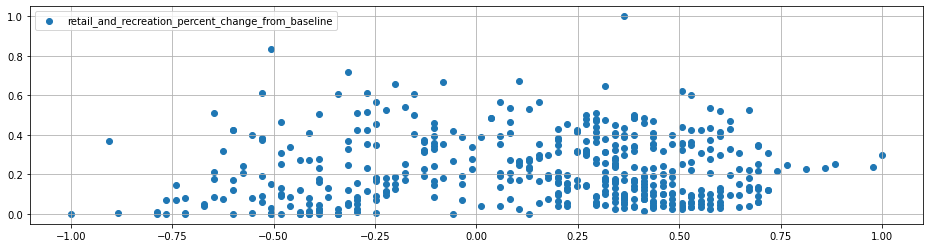

grocery_and_pharmacy_percent_change_from_baseline


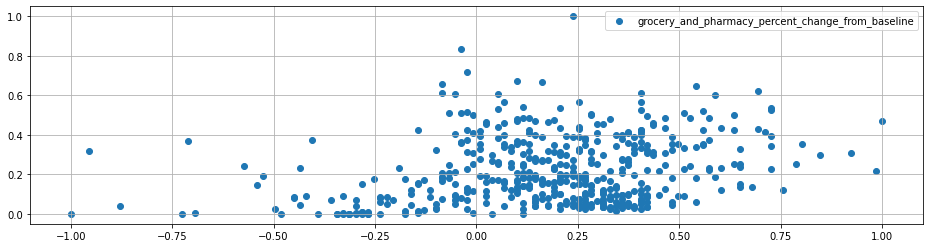

parks_percent_change_from_baseline


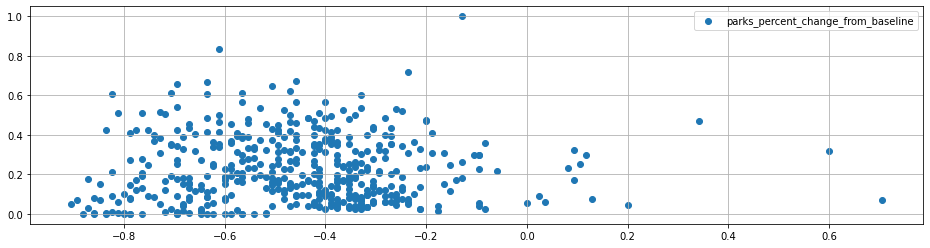

transit_stations_percent_change_from_baseline


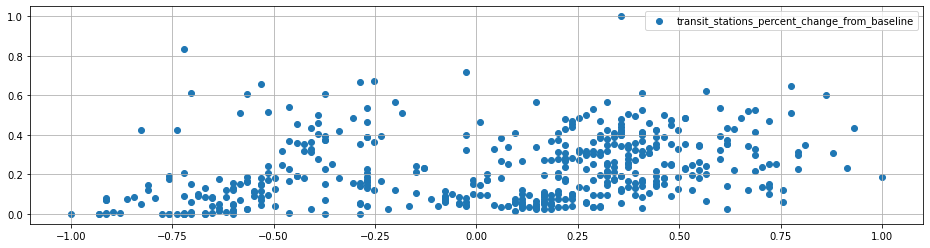

workplaces_percent_change_from_baseline


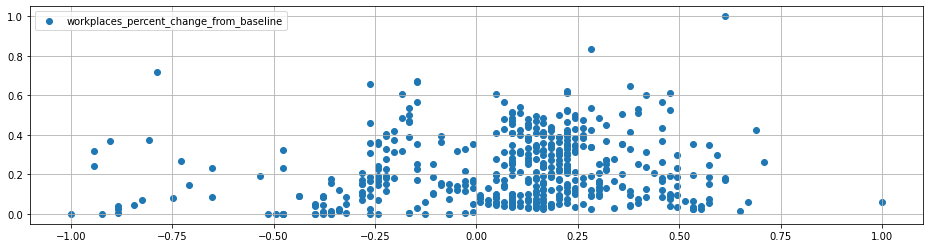

residential_percent_change_from_baseline


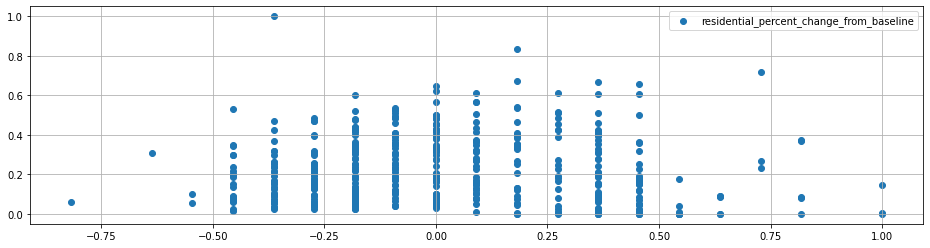

In [47]:
i = 0
for group in categories_google_mobility:
    print(group)
    group_values = mobility_norm[:,i]
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.scatter(group_values[-460:], newCases_norm[-470:-10], label=group) #com offset de 7 dias
#     plt.scatter(group_values[-460:], newCases_norm[-463:-3], label=group) #sem offset de 7 dias 
   
    plt.legend(loc='best') 
    plt.grid()
    plt.show()
    
    i+=1

In [48]:
from keras.models import Sequential
from keras.layers import Dense

X = mobility_norm[-460:,:]
Y = newCases_norm[-470:-10]
Y = Y.reshape((len(Y),1))

print("Mobility Features")
print(X[:5])
print("X shape: ",X.shape)


print("Covid Cases")
print(Y[:5])
print("Y shape: ",Y.shape)



Mobility Features
[[-1.         -1.         -0.8        -1.         -1.          1.        ]
 [-0.50588235 -0.17557252 -0.78823529 -0.77391304 -0.3592233   0.36363636]
 [-0.71764706 -0.32824427 -0.83529412 -0.91304348 -0.06796117  0.18181818]
 [-0.43529412 -0.3129771  -0.64705882 -0.72173913 -0.51456311  0.54545455]
 [-0.41176471 -0.3129771  -0.63529412 -0.72173913 -0.47572816  0.54545455]]
X shape:  (460, 6)
Covid Cases
[[0.00115518]
 [0.0019253 ]
 [0.        ]
 [0.        ]
 [0.00154024]]
Y shape:  (460, 1)


In [69]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))

In [70]:


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=700, batch_size=90)



Epoch 1/700
6/6 [==============================] - 1s 989us/step - loss: 0.5960 - accuracy: 0.0114
Epoch 2/700
6/6 [==============================] - 0s 997us/step - loss: 0.5501 - accuracy: 0.0159
Epoch 3/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.0077
Epoch 4/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.0106
Epoch 5/700
6/6 [==============================] - 0s 972us/step - loss: 0.5339 - accuracy: 0.0136
Epoch 6/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.0069
Epoch 7/700
6/6 [==============================] - 0s 929us/step - loss: 0.5189 - accuracy: 0.0120
Epoch 8/700
6/6 [==============================] - 0s 823us/step - loss: 0.5163 - accuracy: 0.0102
Epoch 9/700
6/6 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.0136
Epoch 10/700
6/6 [==============================] - 0s 805us/step - loss: 0.5079 - accuracy: 0.0081
Epoch 11/700
6/6 

6/6 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.0101
Epoch 165/700
6/6 [==============================] - 0s 798us/step - loss: 0.4830 - accuracy: 0.0109
Epoch 166/700
6/6 [==============================] - 0s 997us/step - loss: 0.4781 - accuracy: 0.0092
Epoch 167/700
6/6 [==============================] - 0s 798us/step - loss: 0.4815 - accuracy: 0.0134
Epoch 168/700
6/6 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.0091
Epoch 169/700
6/6 [==============================] - 0s 983us/step - loss: 0.4843 - accuracy: 0.0085
Epoch 170/700
6/6 [==============================] - 0s 998us/step - loss: 0.4858 - accuracy: 0.0077
Epoch 171/700
6/6 [==============================] - 0s 997us/step - loss: 0.4808 - accuracy: 0.0101
Epoch 172/700
6/6 [==============================] - 0s 906us/step - loss: 0.4767 - accuracy: 0.0089
Epoch 173/700
6/6 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.0136
Epoch 174/

6/6 [==============================] - 0s 997us/step - loss: 0.4751 - accuracy: 0.0131
Epoch 327/700
6/6 [==============================] - 0s 997us/step - loss: 0.4745 - accuracy: 0.0165
Epoch 328/700
6/6 [==============================] - 0s 999us/step - loss: 0.4776 - accuracy: 0.0096
Epoch 329/700
6/6 [==============================] - 0s 888us/step - loss: 0.4773 - accuracy: 0.0101
Epoch 330/700
6/6 [==============================] - 0s 997us/step - loss: 0.4698 - accuracy: 0.0077
Epoch 331/700
6/6 [==============================] - 0s 997us/step - loss: 0.4829 - accuracy: 0.0121
Epoch 332/700
6/6 [==============================] - 0s 997us/step - loss: 0.4865 - accuracy: 0.0105
Epoch 333/700
6/6 [==============================] - 0s 992us/step - loss: 0.4855 - accuracy: 0.0130
Epoch 334/700
6/6 [==============================] - 0s 997us/step - loss: 0.4795 - accuracy: 0.0134
Epoch 335/700
6/6 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.0128
Epoch 

6/6 [==============================] - 0s 998us/step - loss: 0.4716 - accuracy: 0.0073
Epoch 489/700
6/6 [==============================] - 0s 998us/step - loss: 0.4863 - accuracy: 0.0110
Epoch 490/700
6/6 [==============================] - 0s 997us/step - loss: 0.4850 - accuracy: 0.0104
Epoch 491/700
6/6 [==============================] - 0s 700us/step - loss: 0.4867 - accuracy: 0.0080
Epoch 492/700
6/6 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.0118
Epoch 493/700
6/6 [==============================] - 0s 798us/step - loss: 0.4724 - accuracy: 0.0118
Epoch 494/700
6/6 [==============================] - 0s 997us/step - loss: 0.4799 - accuracy: 0.0093
Epoch 495/700
6/6 [==============================] - 0s 798us/step - loss: 0.4791 - accuracy: 0.0112
Epoch 496/700
6/6 [==============================] - 0s 997us/step - loss: 0.4690 - accuracy: 0.0118
Epoch 497/700
6/6 [==============================] - 0s 798us/step - loss: 0.4744 - accuracy: 0.0110
Epoch 

6/6 [==============================] - 0s 997us/step - loss: 0.4676 - accuracy: 0.0126
Epoch 651/700
6/6 [==============================] - 0s 997us/step - loss: 0.4774 - accuracy: 0.0121
Epoch 652/700
6/6 [==============================] - 0s 798us/step - loss: 0.4760 - accuracy: 0.0143
Epoch 653/700
6/6 [==============================] - 0s 848us/step - loss: 0.4795 - accuracy: 0.0110
Epoch 654/700
6/6 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.0085
Epoch 655/700
6/6 [==============================] - 0s 963us/step - loss: 0.4705 - accuracy: 0.0125
Epoch 656/700
6/6 [==============================] - 0s 997us/step - loss: 0.4672 - accuracy: 0.0083
Epoch 657/700
6/6 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.0102
Epoch 658/700
6/6 [==============================] - 0s 997us/step - loss: 0.4698 - accuracy: 0.0073
Epoch 659/700
6/6 [==============================] - 0s 997us/step - loss: 0.4782 - accuracy: 0.0110
Epoch 66

In [52]:
model.output_shape

(None, 1)

In [67]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

15/15 [==============================] - 0s 597us/step - loss: 3.4419 - accuracy: 0.0109
Accuracy: 1.09


In [87]:
newCases = cases_df[regions_selected[1]]['newCases'].values
newCases_norm = newCases/np.max(newCases)
mobility_norm = scaler.fit_transform(mob_df[regions_selected[1]][categories_google_mobility].values)

In [95]:
X_test = mobility_norm[-460:,:]
Y_test = newCases_norm[-470:-10]
Y_test = Y_test.reshape((len(Y_test),1))

print("Mobility Features")
print(X_test[:5])
print("X_test shape: ",X_test.shape)


print("Covid Cases")
print(Y_test[:5])
print("Y_test shape: ",Y_test.shape)

_, accuracY_test = model.evaluate(X_test, Y_test)
print('AccuracY_test: %.2f' % (accuracY_test*100))

MobilitY_test Features
[[-1.         -1.         -0.8        -1.         -1.          1.        ]
 [-0.50588235 -0.17557252 -0.78823529 -0.77391304 -0.3592233   0.36363636]
 [-0.71764706 -0.32824427 -0.83529412 -0.91304348 -0.06796117  0.18181818]
 [-0.43529412 -0.3129771  -0.64705882 -0.72173913 -0.51456311  0.54545455]
 [-0.41176471 -0.3129771  -0.63529412 -0.72173913 -0.47572816  0.54545455]]
X_test shape:  (460, 6)
Covid Cases
[[0.00115518]
 [0.0019253 ]
 [0.        ]
 [0.        ]
 [0.00154024]]
Y_test shape:  (460, 1)
15/15 [==============================] - 0s 641us/step - loss: 0.4723 - accuracy: 0.0109
AccuracY_test: 1.09


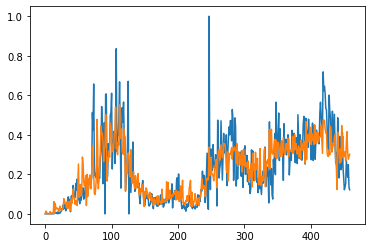

In [96]:
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()